In [2]:
# !pip install gensim

  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.24
    Uninstalling Cython-0.29.24:
      Successfully uninstalled Cython-0.29.24


In [1]:
import pandas as pd
from konlpy.tag import Okt
from gensim.models import word2vec
import matplotlib.pyplot as plt
import nltk # national language tool kit
from wordcloud import WordCloud

t = Okt()

In [2]:
# train_data불러오기
train = pd.read_csv("../../Data/train_data.csv")

In [3]:
train_list = []
for i in range(0, 80):
    train_list.append(train['가사'][i])

In [4]:
len(train_list)

80

In [5]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

---
# 동사토큰

In [6]:
# 텍스를 한 줄씩 처리하기
twitter = Okt()
results3 = []
lines = train_list
for line in lines:
    # 형태소 분석하기
    train_malist = twitter.pos(line,norm=True,stem=True) # 단어의 기본형 사용
    r = []
    for word in train_malist:
        # 어미, 조사, 구두점 등은 대상에서 제외
        if word[1] in ["Verb"]:
            if word[0] != "n":
                r.append(word[0])
    rl3 = (" ".join(r).strip())
    
    results3.append(rl3)
    #print(rl)

In [7]:
token_list3 = str(results3).split(" ")

In [8]:
# 불용어 추가
stop_words3 = ['하다','찬','나','너','걸','수','다시다','내','고서','안','거','그','누구','보나','두','알','코','이','젠'\
                ,'난','해','널',',',"''",'곳',"안녕',","젤","'나르다","나다",'내다','잘',"그대","사람","하나요","안녕']"\
                ,"['나르다","'하다","하다',기다리다',","싶다',","싶다',","'보다","오다',","'만나다","'나다","안다',","'만들다",\
                "'오다","'내다","보다',","'어리다","해주다',","'잊다","'내리다","돌아오다',","'걷다","돼다',","쉬다',","주다',",\
                "가다',","하다',","이다","기다리다',","'이다","대다","남다","잖다","불다","외다","써다"
                ]
token_ko3 = [each_word for each_word in token_list3 if each_word not in stop_words3]


In [9]:
# 상위 100개 단어 확인
ko3 = nltk.Text(token_ko3)
ko3.vocab().most_common(500)

[('보다', 125),
 ('않다', 85),
 ('나르다', 63),
 ('오다', 56),
 ('잊다', 54),
 ('되다', 53),
 ('싶다', 53),
 ('만나다', 38),
 ('주다', 37),
 ('지우다', 36),
 ('버리다', 35),
 ('보내다', 35),
 ('돼다', 33),
 ('가다', 33),
 ('모르다', 31),
 ('웃다', 31),
 ('차다', 29),
 ('알다', 28),
 ('해주다', 28),
 ('말다', 27),
 ('돌아오다', 27),
 ('기다리다', 25),
 ('자다', 24),
 ('걷다', 23),
 ('들다', 22),
 ('걸다', 21),
 ('떠나다', 21),
 ('헤어지다', 21),
 ('부르다', 20),
 ('갈다', 17),
 ('지내다', 17),
 ('만들다', 16),
 ('서다', 15),
 ('바라보다', 14),
 ('그리다', 14),
 ('바라다', 14),
 ('찾다', 13),
 ('끝나다', 13),
 ('해보다', 13),
 ('지키다', 13),
 ('멈추다', 12),
 ('밝다', 12),
 ('멀어지다', 12),
 ('애쓰다', 12),
 ('들리다', 12),
 ('믿다', 12),
 ('보이다', 12),
 ('쉬다', 12),
 ('떨리다', 11),
 ('머물다', 11),
 ('견디다', 11),
 ('따르다', 11),
 ('뜨다', 11),
 ('안다', 11),
 ('느끼다', 10),
 ('지다', 10),
 ('추다', 10),
 ('지나다', 10),
 ('잡다', 10),
 ('다가가다', 9),
 ('나오다', 9),
 ('듣다', 9),
 ('되어다', 9),
 ('놓다', 9),
 ('떠나가다', 9),
 ('맞추다', 8),
 ('흐르다', 8),
 ('붙잡다', 8),
 ('지나치다', 8),
 ('이르다', 8),
 ('느껴지다', 8),
 ('끄다', 8),
 ('채우다', 8),
 ('미우다', 8),


In [10]:
testing = []
for key, val in zip(list(ko3.vocab().keys()),list(ko3.vocab().values())):
    if val < 10:
        testing.append([key,val])

In [11]:
len(testing)

364

In [12]:
testing2 = []
for i in range(len(testing)):
    testing2.append(str(testing[i][0]))

In [13]:
# 1번 사용된 언어 지운후 다시 확인
token_ko4 = set(ko3.vocab()) - set(testing2)
token_ko5 = [each_word for each_word in token_list3 if each_word in token_ko4]
ko6 = nltk.Text(token_ko5)
ko6.vocab().most_common(500)

[('보다', 125),
 ('않다', 85),
 ('나르다', 63),
 ('오다', 56),
 ('잊다', 54),
 ('되다', 53),
 ('싶다', 53),
 ('만나다', 38),
 ('주다', 37),
 ('지우다', 36),
 ('버리다', 35),
 ('보내다', 35),
 ('돼다', 33),
 ('가다', 33),
 ('모르다', 31),
 ('웃다', 31),
 ('차다', 29),
 ('알다', 28),
 ('해주다', 28),
 ('말다', 27),
 ('돌아오다', 27),
 ('기다리다', 25),
 ('자다', 24),
 ('걷다', 23),
 ('들다', 22),
 ('걸다', 21),
 ('떠나다', 21),
 ('헤어지다', 21),
 ('부르다', 20),
 ('갈다', 17),
 ('지내다', 17),
 ('만들다', 16),
 ('서다', 15),
 ('바라보다', 14),
 ('그리다', 14),
 ('바라다', 14),
 ('찾다', 13),
 ('끝나다', 13),
 ('해보다', 13),
 ('지키다', 13),
 ('멈추다', 12),
 ('밝다', 12),
 ('멀어지다', 12),
 ('애쓰다', 12),
 ('들리다', 12),
 ('믿다', 12),
 ('보이다', 12),
 ('쉬다', 12),
 ('떨리다', 11),
 ('머물다', 11),
 ('견디다', 11),
 ('따르다', 11),
 ('뜨다', 11),
 ('안다', 11),
 ('느끼다', 10),
 ('지다', 10),
 ('추다', 10),
 ('지나다', 10),
 ('잡다', 10)]

In [14]:
# 명사 토큰 갯수 (중복제외)
len(list(ko6.vocab()))

59

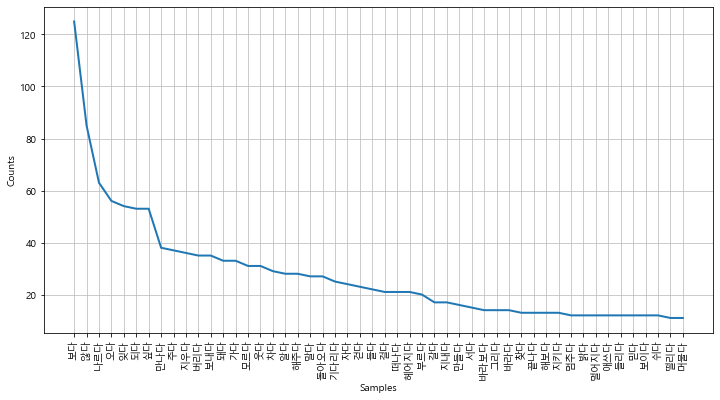

In [15]:
# 상위 50개의 빈도수 차트 만들기
plt.figure(figsize=(12,6))
ko6.plot(50)
plt.show()

In [16]:
#워드클라우드의 모양 설정. 동사이미지 가져오기
import numpy as np
from PIL import *
cand_mask=np.array(Image.open('../../Data/image/동사3.png'))

In [17]:
# 59개 wordcloud로 그리기
data4 = ko6.vocab().most_common(100)

# 딕셔너리로 만들기
tmp_data4 = dict(data4)

wordcloud4 = WordCloud(
    background_color='White',
    colormap= 'gist_earth',
    mask=cand_mask, # 워드클라우드 모양 설정
    font_path= 'c:/Windows/Fonts/malgun.ttf',
    relative_scaling= 0.4
    # font_path="AppleGothic" 
).generate_from_frequencies(tmp_data4)

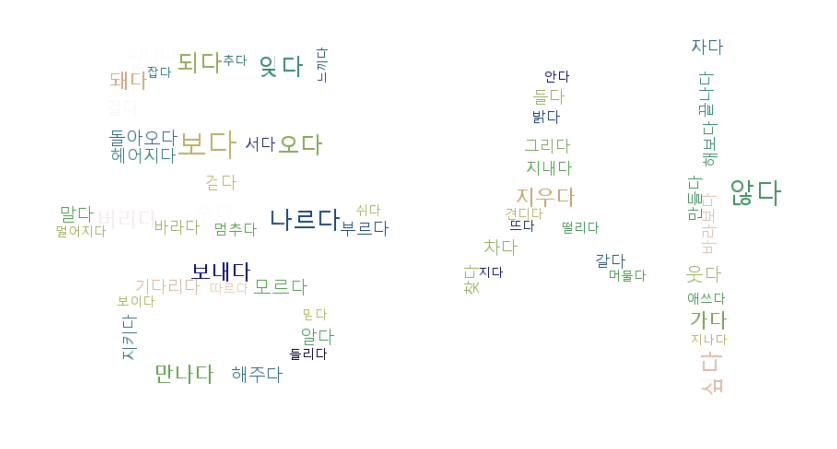

In [18]:
plt.figure(figsize=(16,8))
plt.imshow(wordcloud4, interpolation='bilinear')
plt.axis('off')
plt.show()

In [19]:
len(ko6.vocab())

59

---
# 추출한 토큰 확인하기

In [20]:
# 동사 토큰, 명사 토큰
print("동사토큰 : \n",list(ko6.vocab())," => 동사 토큰 갯수 : ",len(list(ko6.vocab())))

동사토큰 : 
 ['보다', '않다', '나르다', '오다', '잊다', '되다', '싶다', '만나다', '주다', '지우다', '버리다', '보내다', '돼다', '가다', '모르다', '웃다', '차다', '알다', '해주다', '말다', '돌아오다', '기다리다', '자다', '걷다', '들다', '걸다', '떠나다', '헤어지다', '부르다', '갈다', '지내다', '만들다', '서다', '바라보다', '그리다', '바라다', '찾다', '끝나다', '해보다', '지키다', '멈추다', '밝다', '멀어지다', '애쓰다', '들리다', '믿다', '보이다', '쉬다', '떨리다', '머물다', '견디다', '따르다', '뜨다', '안다', '느끼다', '지다', '추다', '지나다', '잡다']  => 동사 토큰 갯수 :  59


In [21]:
token_sum = list(ko6.vocab())

---
# 토큰 one hot

In [22]:
# !pip install tensorflow

In [23]:
from tensorflow import keras

- 가사 데이터 okt로 분류하기

In [24]:
# 텍스를 한 줄씩 처리하기
twitter = Okt() 
okt_result = []
lines = train['가사']
for line in lines:
    # 형태소 분석하기
    train_malist = twitter.pos(line,norm=True,stem=True) # 단어의 기본형 사용
    r = []
    for word in train_malist:
        if word[1] in ["Verb"]:
            if word[0] != "n":
                r.append(word[0])
    rl3 = (" ".join(r).strip())
    
    okt_result.append(rl3)
    # print(rl3)

In [25]:
# 동사와 명사로 분리가 잘 되었는지 확인하기
okt_result[0]

'만나다 빠지다 거닐다 오다 멈추다 바라보다 맞추다 모르다 오다 밝다 빛나다 기대다 멈추다 버리다 하다 잊다 하다 느끼다 들다 비추다 멈추다 오다 다투다 보다 알다 되다 멈추다 버리다 하다 나르다 보다 지다 담다 하다 나르다 안다'

In [26]:
# 인덱스 0은 없는 단어와 padding으로 집어 넣기 나머지 단어들은 1부터 순차적으로 인덱스 부여

word_to_index = {word[0] : index + 1 for index, word in enumerate(token_sum)}
word_to_index['pad'] = 0 # 패딩용 인덱스 0
word_to_index['unk'] = 0 # unknown 용 인덱스 0


# 기존 훈련 데이터에서 각 단어를 고유한 정수로 부여
encoded = []
for line in okt_result: #입력 데이터에서 1줄씩 문장을 읽음
    temp = []
    for w in line: #각 줄에서 1개씩 글자를 읽음
      try:
        temp.append(word_to_index[w]) # 글자를 해당되는 정수로 변환
      except KeyError: # 단어 집합에 없는 단어일 경우 unk로 대체된다.
        temp.append(word_to_index['unk']) # unk의 인덱스로 변환

    encoded.append(temp)

In [27]:
print((encoded[0]))

[32, 3, 0, 0, 0, 58, 0, 0, 0, 0, 0, 0, 4, 0, 0, 41, 57, 0, 0, 36, 0, 47, 0, 0, 0, 57, 0, 0, 15, 0, 0, 0, 4, 0, 0, 42, 0, 0, 0, 3, 0, 0, 22, 0, 0, 0, 41, 57, 0, 0, 11, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 55, 0, 0, 0, 45, 0, 0, 0, 57, 0, 0, 41, 57, 0, 0, 4, 0, 0, 0, 0, 0, 0, 47, 0, 0, 18, 0, 0, 6, 0, 0, 41, 57, 0, 0, 11, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 47, 0, 0, 58, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 54, 0]


---
# 전체 길이 padding작업

In [28]:
import matplotlib.pyplot as plt

가사의 최대 길이 : 227
가사의 최소 길이 : 60
가사의 평균 길이 : 136.125000


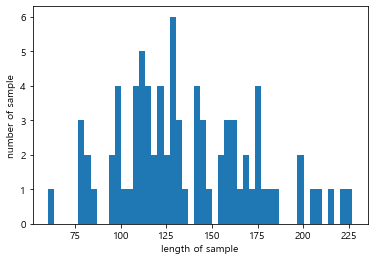

In [29]:
# 정해줄 길이를 찾기 위해 가장 긴 리뷰 길이 확인
max_length = max(len(l) for l in encoded)
print('가사의 최대 길이 : %d' % max_length)
print('가사의 최소 길이 : %d' % min(len(l) for l in encoded))
print('가사의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))
plt.hist([len(s) for s in encoded], bins=50)
plt.xlabel('length of sample')
plt.ylabel('number of sample')
plt.show()

In [30]:
# 문장마다 단어 갯수가 다르므로 sequence padding을 넣어서 문장의 길이 동일하게 만들기 
# 이거하려고 위에서 단어갯수 체크한거임

padding_paragraphs_encoding = keras.preprocessing.sequence.pad_sequences(encoded, maxlen=max_length, padding='post')
padding_paragraphs_encoding

array([[32,  3,  0, ...,  0,  0,  0],
       [32, 45,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [26,  0, 14, ...,  0,  0,  0],
       [ 3,  0,  0, ...,  0,  0,  0]])

In [31]:
print(len(list(padding_paragraphs_encoding)), len(list(padding_paragraphs_encoding)[1]))

80 227


In [32]:
# 분류항목['happy', 'sad', 'regret', 'indifference']를 수치로 변경하기
categories = train['감정'].to_list()

def category_encoding(category):
    if category == 'happy':
        return 0
    elif category == 'sad':
        return 1
    elif category == 'regret':
        return 2
    else:
        return 3

In [33]:
encoded_category = [category_encoding(category) for category in categories]
encoded_category[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [34]:
len(encoded_category)

80

---
# 가사 감정 RNN model

In [35]:
# train test data 만들기
from sklearn.model_selection import train_test_split


train_input, test_input, train_target, test_target = train_test_split(
    padding_paragraphs_encoding, encoded_category, test_size=0.2
)

In [36]:
# train val data 만들기
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2
)

In [37]:
import warnings
from tensorflow import keras 

# GPU 사용 설정
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = '1'

warnings.filterwarnings('ignore')

In [38]:
print(train_input.shape, val_input.shape)

(51, 227) (13, 227)


In [39]:
model = keras.Sequential()
# 문맥 생성 단계
model.add(keras.layers.SimpleRNN(64, input_shape=(227, 60),dropout=0.1))
model.add(keras.layers.Dense(4, activation='softmax')) # 문장은 확률값을 구해야하므로

In [40]:
import numpy as np

In [41]:
train_oh = keras.utils.to_categorical(train_input)
train_oh.shape

(51, 227, 60)

In [42]:
print(np.sum(train_oh[0][0]))

1.0


In [43]:
val_oh = keras.utils.to_categorical(val_input)
val_oh.shape

(13, 227, 60)

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 64)                8000      
                                                                 
 dense (Dense)               (None, 4)                 260       
                                                                 
Total params: 8,260
Trainable params: 8,260
Non-trainable params: 0
_________________________________________________________________


In [49]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-3)
model.compile(
    optimizer=rmsprop,
    loss = 'sparse_categorical_crossentropy',
    metrics = 'accuracy'
    )

checkpoint_cb = keras.callbacks.ModelCheckpoint("Data/best-train_rnn-model.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=5,
    restore_best_weights= True
)

history = model.fit(
    np.array(train_oh),
    np.array(train_target),
    epochs=5000,
    #batch_size=64, # mini batch 경사 하강법
    validation_data = (np.array(val_oh), np.array(val_target)),
    # callbacks = [checkpoint_cb, early_stopping_cb]
)

Epoch 1/5000
2/2 [==============================] - 2s 895ms/step - loss: 1.3909 - accuracy: 0.3137 - val_loss: 1.8284 - val_accuracy: 0.0000e+00
Epoch 2/5000
2/2 [==============================] - 0s 169ms/step - loss: 1.3460 - accuracy: 0.3529 - val_loss: 1.4293 - val_accuracy: 0.3077
Epoch 3/5000
2/2 [==============================] - 0s 143ms/step - loss: 1.4466 - accuracy: 0.2549 - val_loss: 1.4784 - val_accuracy: 0.1538
Epoch 4/5000
2/2 [==============================] - 0s 116ms/step - loss: 1.3518 - accuracy: 0.3137 - val_loss: 1.4578 - val_accuracy: 0.2308
Epoch 5/5000
2/2 [==============================] - 0s 100ms/step - loss: 1.3924 - accuracy: 0.2745 - val_loss: 1.4568 - val_accuracy: 0.1538
Epoch 6/5000
2/2 [==============================] - 0s 142ms/step - loss: 1.3811 - accuracy: 0.2745 - val_loss: 1.4313 - val_accuracy: 0.1538
Epoch 7/5000
2/2 [==============================] - 0s 152ms/step - loss: 1.3992 - accuracy: 0.1765 - val_loss: 1.4545 - val_accuracy: 0.1538
Ep

In [50]:
print("accuracy :" , np.mean(history.history['accuracy']))
print("val_accuracy :" , np.mean(history.history['val_accuracy']))

accuracy : 0.30920785223990677
val_accuracy : 0.17770769661068916


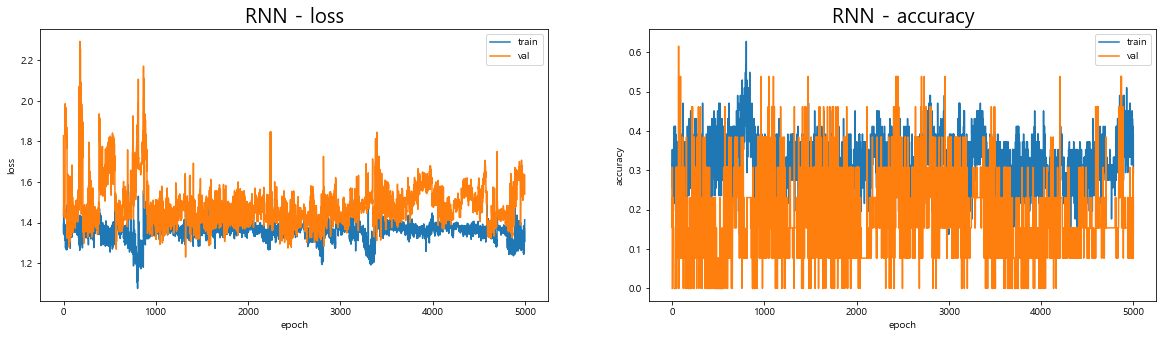

In [51]:
# 시각화 해보기
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(1,2,1) # 1행 2열의 첫번째다.
ax2 = fig.add_subplot(1,2,2) # 1행 2열의 두번째다.

ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])

ax1.set_xlabel('epoch')
ax2.set_xlabel('epoch')

ax1.set_ylabel('loss')
ax2.set_ylabel('accuracy')

ax1.legend(['train','val'])
ax2.legend(['train','val'])


ax1.set_title("RNN - loss", size=20)
ax2.set_title("RNN - accuracy", size=20)
plt.show()

---
# 빈도수 20이상

In [52]:
testing_not20 = []
for key, val in zip(list(ko3.vocab().keys()),list(ko3.vocab().values())):
    if val < 20:
        testing_not20.append([key,val])

In [53]:
len(testing_not20)

394

In [54]:
testing_not20_1 = []
for i in range(len(testing_not20)):
    testing_not20_1.append(str(testing_not20[i][0]))

In [55]:
# 1번 사용된 언어 지운후 다시 확인
token_ko_not20 = set(ko3.vocab()) - set(testing_not20_1)
token_ko_not20 = [each_word for each_word in token_list3 if each_word in token_ko_not20]
ko7 = nltk.Text(token_ko_not20)
ko7.vocab().most_common(500)

[('보다', 125),
 ('않다', 85),
 ('나르다', 63),
 ('오다', 56),
 ('잊다', 54),
 ('되다', 53),
 ('싶다', 53),
 ('만나다', 38),
 ('주다', 37),
 ('지우다', 36),
 ('버리다', 35),
 ('보내다', 35),
 ('돼다', 33),
 ('가다', 33),
 ('모르다', 31),
 ('웃다', 31),
 ('차다', 29),
 ('알다', 28),
 ('해주다', 28),
 ('말다', 27),
 ('돌아오다', 27),
 ('기다리다', 25),
 ('자다', 24),
 ('걷다', 23),
 ('들다', 22),
 ('걸다', 21),
 ('떠나다', 21),
 ('헤어지다', 21),
 ('부르다', 20)]

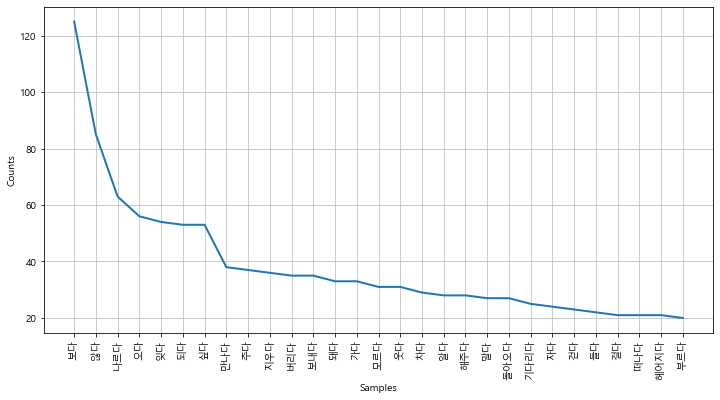

In [56]:
# 상위 50개의 빈도수 차트 만들기
plt.figure(figsize=(12,6))
ko7.plot(50)
plt.show()

In [58]:
# 29개 wordcloud로 그리기
data7 = ko7.vocab().most_common(100)

# 딕셔너리로 만들기
tmp_data7 = dict(data7)

wordcloud7 = WordCloud(
    background_color='White',
    colormap= 'gist_earth',
    # mask=cand_mask, # 워드클라우드 모양 설정
    relative_scaling=0.8,
    font_path= 'c:/Windows/Fonts/malgun.ttf',
    # font_path="AppleGothic" 
).generate_from_frequencies(tmp_data7)

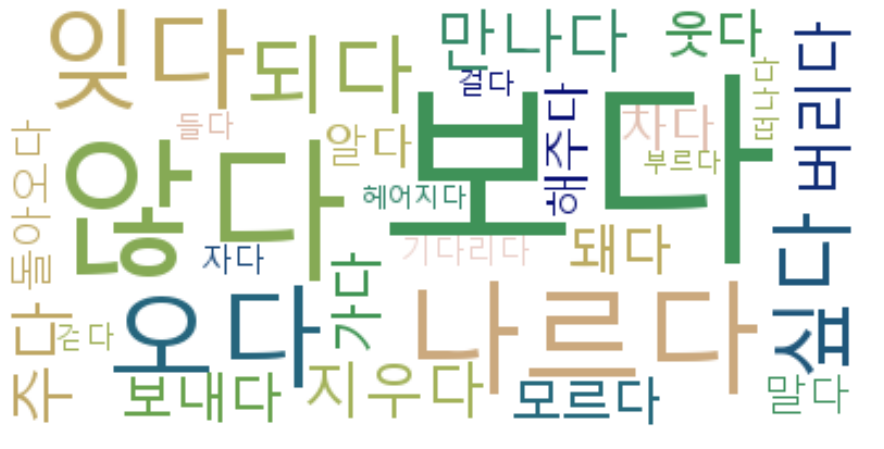

In [59]:
plt.figure(figsize=(16,8))
plt.imshow(wordcloud7, interpolation='bilinear')
plt.axis('off')
plt.show()

In [60]:
# 동사 토큰, 명사 토큰
print("동사토큰 : \n",list(ko7.vocab())," => 동사 토큰 갯수 : ",len(list(ko7.vocab())))

동사토큰 : 
 ['보다', '않다', '나르다', '오다', '잊다', '되다', '싶다', '만나다', '주다', '지우다', '버리다', '보내다', '돼다', '가다', '모르다', '웃다', '차다', '알다', '해주다', '말다', '돌아오다', '기다리다', '자다', '걷다', '들다', '걸다', '떠나다', '헤어지다', '부르다']  => 동사 토큰 갯수 :  29


In [61]:
token_sum7 = list(ko7.vocab())

In [62]:
# 텍스를 한 줄씩 처리하기
twitter = Okt() 
okt_result7 = []
lines = train['가사']
for line in lines:
    # 형태소 분석하기
    train_malist7 = twitter.pos(line,norm=True,stem=True) # 단어의 기본형 사용
    r = []
    for word in train_malist:
        if word[1] in ["Verb"]:
            if word[0] != "n":
                r.append(word[0])
    rl7 = (" ".join(r).strip())
    
    okt_result7.append(rl7)
print(rl7)

나르다 배우다 않다 더디다 서두르다 오다 하다 나르다 짓다 만들다 다시다 하다 불어오다 불다 하다 내다 하다 나르다 만들다 내다 하다 돌아오다 받다 두다 하다 하다 하다 만나다 모르다 지나가다 나다 지우다 하다 끝나다 하다


In [63]:
# 동사와 명사로 분리가 잘 되었는지 확인하기
okt_result7[0]

'나르다 배우다 않다 더디다 서두르다 오다 하다 나르다 짓다 만들다 다시다 하다 불어오다 불다 하다 내다 하다 나르다 만들다 내다 하다 돌아오다 받다 두다 하다 하다 하다 만나다 모르다 지나가다 나다 지우다 하다 끝나다 하다'

In [64]:
# 인덱스 0은 없는 단어와 padding으로 집어 넣기 나머지 단어들은 1부터 순차적으로 인덱스 부여

word_to_index = {word[0] : index + 1 for index, word in enumerate(token_sum7)}
word_to_index['pad'] = 0 # 패딩용 인덱스 0
word_to_index['unk'] = 0 # unknown 용 인덱스 0


# 기존 훈련 데이터에서 각 단어를 고유한 정수로 부여
encoded7 = []
for line in okt_result7: #입력 데이터에서 1줄씩 문장을 읽음
    temp = []
    for w in line: #각 줄에서 1개씩 글자를 읽음
      try:
        temp.append(word_to_index[w]) # 글자를 해당되는 정수로 변환
      except KeyError: # 단어 집합에 없는 단어일 경우 unk로 대체된다.
        temp.append(word_to_index['unk']) # unk의 인덱스로 변환

    encoded7.append(temp)

가사의 최대 길이 : 124
가사의 최소 길이 : 124
가사의 평균 길이 : 124.000000


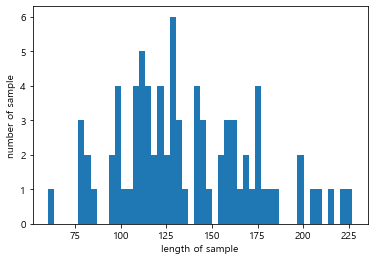

In [65]:
# 정해줄 길이를 찾기 위해 가장 긴 리뷰 길이 확인
max_length = max(len(l) for l in encoded7)
print('가사의 최대 길이 : %d' % max_length)
print('가사의 최소 길이 : %d' % min(len(l) for l in encoded7))
print('가사의 평균 길이 : %f' % (sum(map(len, encoded7))/len(encoded7)))
plt.hist([len(s) for s in encoded], bins=50)
plt.xlabel('length of sample')
plt.ylabel('number of sample')
plt.show()

In [66]:
# 문장마다 단어 갯수가 다르므로 sequence padding을 넣어서 문장의 길이 동일하게 만들기 
# 이거하려고 위에서 단어갯수 체크한거임

padding_paragraphs_encoding7 = keras.preprocessing.sequence.pad_sequences(encoded7, maxlen=max_length, padding='post')
padding_paragraphs_encoding7

array([[3, 0, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0],
       ...,
       [3, 0, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0]])

In [67]:
print(len(list(padding_paragraphs_encoding7)), len(list(padding_paragraphs_encoding7)[1]))

80 124


In [68]:
# 분류항목['happy', 'sad', 'regret', 'indifference']를 수치로 변경하기
categories = train['감정'].to_list()

def category_encoding(category):
    if category == 'happy':
        return 0
    elif category == 'sad':
        return 1
    elif category == 'regret':
        return 2
    else:
        return 3

In [69]:
encoded_category7 = [category_encoding(category) for category in categories]
encoded_category7[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [70]:
# train test data 만들기
from sklearn.model_selection import train_test_split


train_input, test_input, train_target, test_target = train_test_split(
    padding_paragraphs_encoding7, encoded_category7, test_size=0.2
)

In [71]:
# train val data 만들기
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2
)

In [72]:
model = keras.Sequential()
# 문맥 생성 단계
model.add(keras.layers.SimpleRNN(64, input_shape=(124, 26),dropout=0.1))
model.add(keras.layers.Dense(4, activation='softmax')) # 문장은 확률값을 구해야하므로

In [73]:
train_oh = keras.utils.to_categorical(train_input)
train_oh.shape

(51, 124, 26)

In [74]:
val_oh = keras.utils.to_categorical(val_input)
val_oh.shape

(13, 124, 26)

In [75]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 64)                5824      
                                                                 
 dense_1 (Dense)             (None, 4)                 260       
                                                                 
Total params: 6,084
Trainable params: 6,084
Non-trainable params: 0
_________________________________________________________________


In [76]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-3)
model.compile(
    optimizer=rmsprop,
    loss = 'sparse_categorical_crossentropy',
    metrics = 'accuracy'
    )

checkpoint_cb = keras.callbacks.ModelCheckpoint("Data/best-train_rnn_over20-model.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=5,
    restore_best_weights= True
)

history = model.fit(
    np.array(train_oh),
    np.array(train_target),
    epochs=1000,
    #batch_size=64, # mini batch 경사 하강법
    validation_data = (np.array(val_oh), np.array(val_target)),
    # callbacks = [checkpoint_cb, early_stopping_cb]
)

Epoch 1/1000
2/2 [==============================] - 2s 388ms/step - loss: 1.4782 - accuracy: 0.2353 - val_loss: 1.4095 - val_accuracy: 0.2308
Epoch 2/1000
2/2 [==============================] - 0s 73ms/step - loss: 1.4089 - accuracy: 0.2353 - val_loss: 1.4471 - val_accuracy: 0.1538
Epoch 3/1000
2/2 [==============================] - 0s 78ms/step - loss: 1.3928 - accuracy: 0.2745 - val_loss: 1.3633 - val_accuracy: 0.3846
Epoch 4/1000
2/2 [==============================] - 0s 84ms/step - loss: 1.4335 - accuracy: 0.2353 - val_loss: 1.3799 - val_accuracy: 0.2308
Epoch 5/1000
2/2 [==============================] - 0s 80ms/step - loss: 1.3691 - accuracy: 0.2353 - val_loss: 1.3870 - val_accuracy: 0.2308
Epoch 6/1000
2/2 [==============================] - 0s 93ms/step - loss: 1.3771 - accuracy: 0.2941 - val_loss: 1.3724 - val_accuracy: 0.2308
Epoch 7/1000
2/2 [==============================] - 0s 414ms/step - loss: 1.4029 - accuracy: 0.2745 - val_loss: 1.3891 - val_accuracy: 0.2308
Epoch 8/100

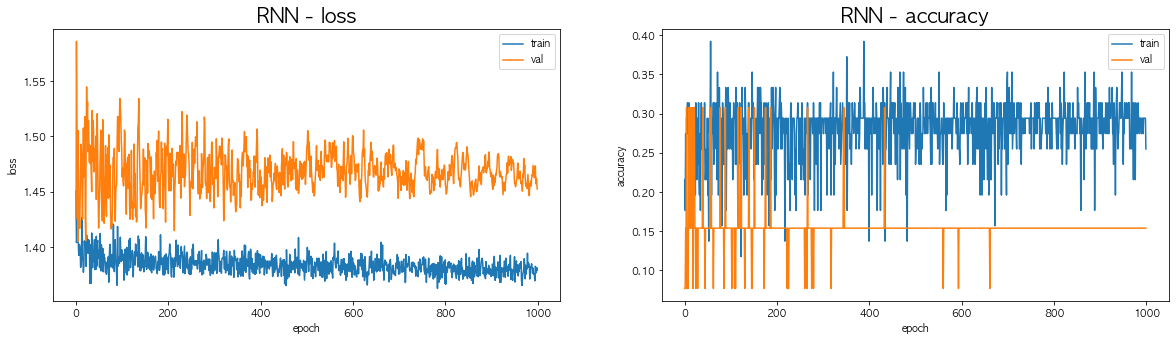

In [154]:
# 시각화 해보기
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(1,2,1) # 1행 2열의 첫번째다.
ax2 = fig.add_subplot(1,2,2) # 1행 2열의 두번째다.

ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])

ax1.set_xlabel('epoch')
ax2.set_xlabel('epoch')

ax1.set_ylabel('loss')
ax2.set_ylabel('accuracy')

ax1.legend(['train','val'])
ax2.legend(['train','val'])


ax1.set_title("RNN - loss", size=20)
ax2.set_title("RNN - accuracy", size=20)
plt.show()

---
# 빈도수 15이상

In [155]:
testing_not15 = []
for key, val in zip(list(ko3.vocab().keys()),list(ko3.vocab().values())):
    if val < 15:
        testing_not15.append([key,val])

In [156]:
len(testing_not15)

391

In [157]:
testing_not15_1 = []
for i in range(len(testing_not15)):
    testing_not15_1.append(str(testing_not15[i][0]))

In [158]:
# 1번 사용된 언어 지운후 다시 확인
token_ko_not15 = set(ko3.vocab()) - set(testing_not20_1)
token_ko_not15 = [each_word for each_word in token_list3 if each_word in token_ko_not15]
ko8 = nltk.Text(token_ko_not15)
len(ko8.vocab().most_common(500))

29

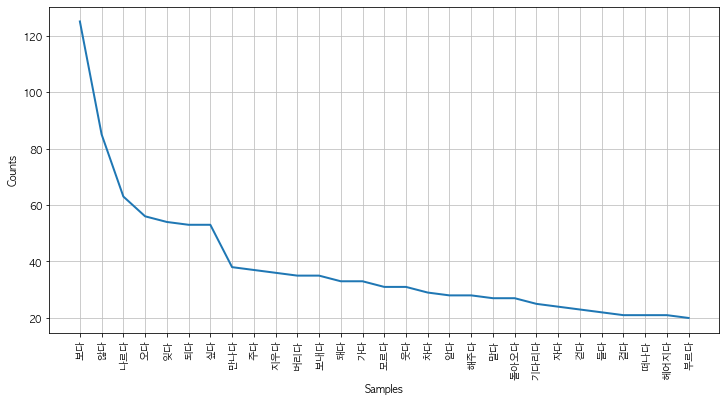

In [159]:
# 상위 50개의 빈도수 차트 만들기
plt.figure(figsize=(12,6))
ko8.plot(100)
plt.show()

In [160]:
# 29개 wordcloud로 그리기
data8 = ko8.vocab().most_common(100)

# 딕셔너리로 만들기
tmp_data8 = dict(data8)

wordcloud8 = WordCloud(
    background_color='White',
    colormap= 'gist_earth',
    # mask=cand_mask, # 워드클라우드 모양 설정
    relative_scaling=0.8,
    font_path="AppleGothic" 
).generate_from_frequencies(tmp_data8)

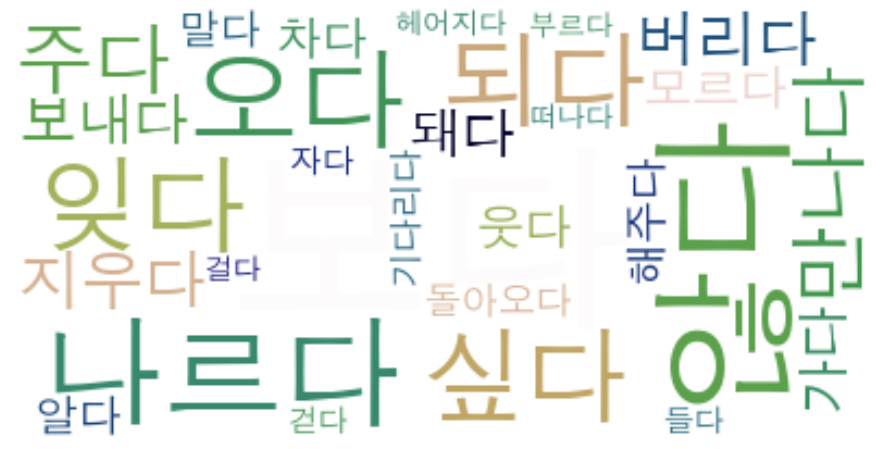

In [161]:
plt.figure(figsize=(16,8))
plt.imshow(wordcloud8, interpolation='bilinear')
plt.axis('off')
plt.show()

In [162]:
# 동사 토큰, 명사 토큰
print("동사토큰 : \n",list(ko8.vocab())," => 동사 토큰 갯수 : ",len(list(ko8.vocab())))

동사토큰 : 
 ['보다', '않다', '나르다', '오다', '잊다', '되다', '싶다', '만나다', '주다', '지우다', '버리다', '보내다', '돼다', '가다', '모르다', '웃다', '차다', '알다', '해주다', '말다', '돌아오다', '기다리다', '자다', '걷다', '들다', '걸다', '떠나다', '헤어지다', '부르다']  => 동사 토큰 갯수 :  29


In [163]:
token_sum8 = list(ko8.vocab())

In [164]:
# 텍스를 한 줄씩 처리하기
twitter = Okt() 
okt_result8 = []
lines = train['가사']
for line in lines:
    # 형태소 분석하기
    train_malist8 = twitter.pos(line,norm=True,stem=True) # 단어의 기본형 사용
    r = []
    for word in train_malist:
        if word[1] in ["Verb"]:
            if word[0] != "n":
                r.append(word[0])
    rl8 = (" ".join(r).strip())
    
    okt_result8.append(rl8)
print(rl8)

나르다 배우다 않다 더디다 서두르다 오다 하다 나르다 짓다 만들다 다시다 하다 불어오다 불다 하다 내다 하다 나르다 만들다 내다 하다 돌아오다 받다 두다 하다 하다 하다 만나다 모르다 지나가다 나다 지우다 하다 끝나다 하다


In [165]:
# 동사와 명사로 분리가 잘 되었는지 확인하기
okt_result8[0]

'나르다 배우다 않다 더디다 서두르다 오다 하다 나르다 짓다 만들다 다시다 하다 불어오다 불다 하다 내다 하다 나르다 만들다 내다 하다 돌아오다 받다 두다 하다 하다 하다 만나다 모르다 지나가다 나다 지우다 하다 끝나다 하다'

In [166]:
# 인덱스 0은 없는 단어와 padding으로 집어 넣기 나머지 단어들은 1부터 순차적으로 인덱스 부여

word_to_index = {word[0] : index + 1 for index, word in enumerate(token_sum8)}
word_to_index['pad'] = 0 # 패딩용 인덱스 0
word_to_index['unk'] = 0 # unknown 용 인덱스 0


# 기존 훈련 데이터에서 각 단어를 고유한 정수로 부여
encoded8 = []
for line in okt_result8: #입력 데이터에서 1줄씩 문장을 읽음
    temp = []
    for w in line: #각 줄에서 1개씩 글자를 읽음
      try:
        temp.append(word_to_index[w]) # 글자를 해당되는 정수로 변환
      except KeyError: # 단어 집합에 없는 단어일 경우 unk로 대체된다.
        temp.append(word_to_index['unk']) # unk의 인덱스로 변환

    encoded8.append(temp)

가사의 최대 길이 : 124
가사의 최소 길이 : 124
가사의 평균 길이 : 124.000000


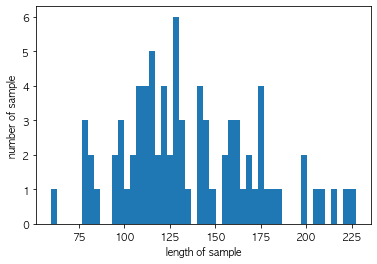

In [167]:
# 정해줄 길이를 찾기 위해 가장 긴 리뷰 길이 확인
max_length = max(len(l) for l in encoded8)
print('가사의 최대 길이 : %d' % max_length)
print('가사의 최소 길이 : %d' % min(len(l) for l in encoded8))
print('가사의 평균 길이 : %f' % (sum(map(len, encoded8))/len(encoded8)))
plt.hist([len(s) for s in encoded], bins=50)
plt.xlabel('length of sample')
plt.ylabel('number of sample')
plt.show()

In [168]:
# 문장마다 단어 갯수가 다르므로 sequence padding을 넣어서 문장의 길이 동일하게 만들기 
# 이거하려고 위에서 단어갯수 체크한거임

padding_paragraphs_encoding8 = keras.preprocessing.sequence.pad_sequences(encoded8, maxlen=max_length, padding='post')
padding_paragraphs_encoding8

array([[3, 0, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0],
       ...,
       [3, 0, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [169]:
print(len(list(padding_paragraphs_encoding8)), len(list(padding_paragraphs_encoding8)[1]))

80 124


In [170]:
# 분류항목['happy', 'sad', 'regret', 'indifference']를 수치로 변경하기
categories = train['감정'].to_list()

def category_encoding(category):
    if category == 'happy':
        return 0
    elif category == 'sad':
        return 1
    elif category == 'regret':
        return 2
    else:
        return 3

In [171]:
encoded_category8 = [category_encoding(category) for category in categories]
encoded_category8[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [172]:
# train test data 만들기
from sklearn.model_selection import train_test_split


train_input, test_input, train_target, test_target = train_test_split(
    padding_paragraphs_encoding8, encoded_category8, test_size=0.2
)

In [173]:
# train val data 만들기
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2
)

In [176]:
model = keras.Sequential()
# 문맥 생성 단계
model.add(keras.layers.SimpleRNN(64, input_shape=(124, 26),dropout=0.1))
model.add(keras.layers.Dense(4, activation='softmax')) # 문장은 확률값을 구해야하므로

In [177]:
train_oh = keras.utils.to_categorical(train_input)
train_oh.shape

(51, 124, 26)

In [178]:
val_oh = keras.utils.to_categorical(val_input)
val_oh.shape

(13, 124, 26)

In [179]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_6 (SimpleRNN)    (None, 64)                5824      
                                                                 
 dense_6 (Dense)             (None, 4)                 260       
                                                                 
Total params: 6,084
Trainable params: 6,084
Non-trainable params: 0
_________________________________________________________________


In [180]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-3)
model.compile(
    optimizer=rmsprop,
    loss = 'sparse_categorical_crossentropy',
    metrics = 'accuracy'
    )

checkpoint_cb = keras.callbacks.ModelCheckpoint("Data/best-train_rnn_over15-model.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=5,
    restore_best_weights= True
)

history = model.fit(
    np.array(train_oh),
    np.array(train_target),
    epochs=1000,
    #batch_size=64, # mini batch 경사 하강법
    validation_data = (np.array(val_oh), np.array(val_target)),
    # callbacks = [checkpoint_cb, early_stopping_cb]
)

Epoch 1/1000
2/2 [==============================] - 3s 858ms/step - loss: 1.6047 - accuracy: 0.2353 - val_loss: 1.5007 - val_accuracy: 0.1538
Epoch 2/1000
2/2 [==============================] - 0s 165ms/step - loss: 1.4344 - accuracy: 0.2745 - val_loss: 1.4178 - val_accuracy: 0.1538
Epoch 3/1000
2/2 [==============================] - 0s 54ms/step - loss: 1.4317 - accuracy: 0.1961 - val_loss: 1.4382 - val_accuracy: 0.0769
Epoch 4/1000
2/2 [==============================] - 0s 118ms/step - loss: 1.3885 - accuracy: 0.3137 - val_loss: 1.4531 - val_accuracy: 0.0769
Epoch 5/1000
2/2 [==============================] - 0s 59ms/step - loss: 1.4491 - accuracy: 0.1373 - val_loss: 1.5307 - val_accuracy: 0.0769
Epoch 6/1000
2/2 [==============================] - 0s 59ms/step - loss: 1.4010 - accuracy: 0.2941 - val_loss: 1.4325 - val_accuracy: 0.0769
Epoch 7/1000
2/2 [==============================] - 0s 79ms/step - loss: 1.3845 - accuracy: 0.2353 - val_loss: 1.4246 - val_accuracy: 0.0769
Epoch 8/10

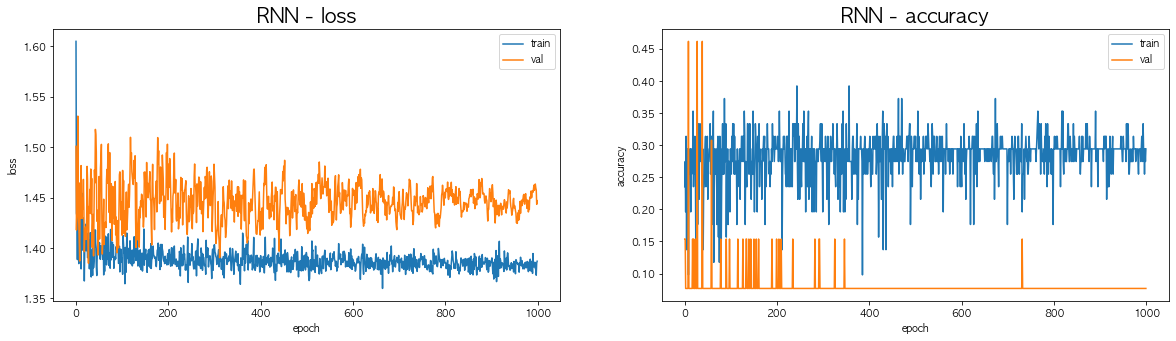

In [181]:
# 시각화 해보기
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(1,2,1) # 1행 2열의 첫번째다.
ax2 = fig.add_subplot(1,2,2) # 1행 2열의 두번째다.

ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])

ax1.set_xlabel('epoch')
ax2.set_xlabel('epoch')

ax1.set_ylabel('loss')
ax2.set_ylabel('accuracy')

ax1.legend(['train','val'])
ax2.legend(['train','val'])


ax1.set_title("RNN - loss", size=20)
ax2.set_title("RNN - accuracy", size=20)
plt.show()

---
# 가사 감정 LSTM

In [46]:
# model = keras.Sequential()

# model.add(keras.layers.Embedding(max_length, 16, input_length=100))
# model.add(keras.layers.LSTM(8, dropout=0.3)) # 8개의 셀을 사용한다, 드롭아웃 0.3 넣기
# model.add(keras.layers.Dense(4, activation='softmax'))

# model.summary()

In [47]:
# # 훈련하기
# # rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
# model.compile(
#     optimizer='adam', 
#     loss='sparse_categorical_crossentropy', 
#     metrics ='accuracy'
#     ) 

# checkpoint_cb = keras.callbacks.ModelCheckpoint("Data/best-train-lstm-model.h5")
# early_stopping_cb = keras.callbacks.EarlyStopping(
#     patience = 3,
#     restore_best_weights = True
# )

# history = model.fit(
#     np.array(train_input),
#     np.array(train_target),
#     epochs=100, # RNN에서 제일 작은게 100임.
#     batch_size = 64,  # mini batch 경사하강법
#     validation_data = (np.array(val_input), np.array(val_target)),
#     callbacks = [checkpoint_cb, early_stopping_cb]
# )